# Evaluate Model
>Compute a confusion matrix

In [1]:
from tensorflow.keras.models import load_model
from utils import plot_confusion_matrix


#load the test data and labels
test_body_vecs = np.load('test_body_vecs.npy')
test_title_vecs = np.load('test_title_vecs.npy')
test_labels = np.load('test_labels.npy')

#load the best model
best_model = load_model('Issue_Label_v1_best_model.hdf5')

#get predictions
y_pred = np.argmax(best_model.predict(x=[test_body_vecs, test_title_vecs],
                                      batch_size=15000),
                   axis=1)

# get labels
y_test = test_labels[:, 0]

Normalized confusion matrix
[[0.88173203 0.09765211 0.02061586]
 [0.1303451  0.83997974 0.02967516]
 [0.27873486 0.23896011 0.48230502]]


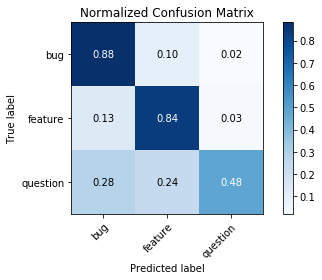

In [39]:
plot_confusion_matrix(y_test, 
                      y_pred, 
                      classes=np.array(['bug', 'feature', 'question']), 
                      normalize=True, 
                      title='Normalized Confusion Matrix')

# Make Predictions

In [5]:
from utils import IssueLabeler
from tensorflow.keras.models import load_model
import dill as dpickle

In [6]:
#load the best model
best_model = load_model('Issue_Label_v1_best_model.hdf5')

#load the pre-processors
with open('title_pp.dpkl', 'rb') as f:
    title_pp = dpickle.load(f)

with open('body_pp.dpkl', 'rb') as f:
    body_pp = dpickle.load(f)
    
# instantiate the IssueLabeler object
issue_labeler = IssueLabeler(body_text_preprocessor=body_pp,
                             title_text_preprocessor=title_pp,
                             model=best_model)    

Using TensorFlow backend.


In [9]:
issue_labeler.get_probabilities(body='Can someone please help me?', 
                                title='random stuff')

{'bug': 0.12618249654769897,
 'feature': 0.1929263472557068,
 'question': 0.6808911561965942}

In [10]:
issue_labeler.get_probabilities(body='It would be great to add a new button', 
                                title='requesting a button')

{'bug': 0.019261939451098442,
 'feature': 0.9305700659751892,
 'question': 0.05016808584332466}

In [11]:
issue_labeler.get_probabilities(body='It does` not work, I get bad errors', 
                                title='nothing works')

{'bug': 0.9065071940422058,
 'feature': 0.03202613815665245,
 'question': 0.06146678701043129}